<a href="https://colab.research.google.com/github/AT0518/Assisnment/blob/main/Kaholas's_Assisnm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [3]:
#Load the dataset

In [35]:
df = pd.read_csv('dataset.csv')

In [7]:
#Display Firt 5 rows of the dataset

In [36]:
print(df.head())

   Age  Gender  Blood Pressure Cholesterol Blood Sugar Disease
0   58  Female             112         Low        High      No
1   25    Male             130         Low        High      No
2   19  Female             151        High        High     Yes
3   65  Female              98         Low         Low      No
4   35  Female             132         Low         Low     Yes


In [9]:
#Get summary statistics of numerical features

In [38]:
print(df.describe())

               Age  Blood Pressure
count  5000.000000     5000.000000
mean     46.226200      124.565400
std      16.263712       20.043025
min      18.000000       90.000000
25%      33.000000      107.000000
50%      46.000000      125.000000
75%      60.000000      142.000000
max      74.000000      159.000000


In [12]:
#Get the distribution of the catagorical features

In [39]:
print(df['Gender'].value_counts())
print(df['Cholesterol'].value_counts())
print(df['Blood Sugar'].value_counts())
print(df['Disease'].value_counts())


Female    2507
Male      2493
Name: Gender, dtype: int64
High    2584
Low     2416
Name: Cholesterol, dtype: int64
High    2538
Low     2462
Name: Blood Sugar, dtype: int64
No     2523
Yes    2477
Name: Disease, dtype: int64


In [17]:
#Visualize the numerical features

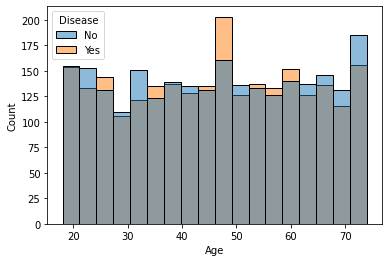

In [40]:
sns.histplot(data=df, x='Age', hue='Disease')
plt.show()

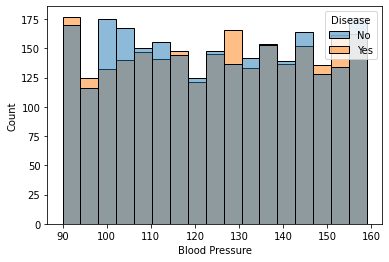

In [41]:
sns.histplot(data=df, x='Blood Pressure', hue='Disease')
plt.show()

In [21]:
#visualize the categorical features
 

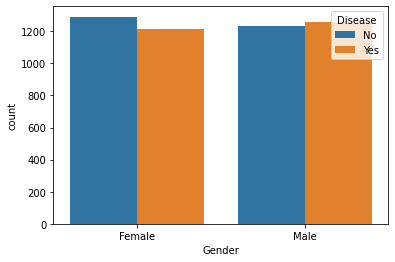

In [42]:
sns.countplot(data=df, x='Gender', hue='Disease')
plt.show()

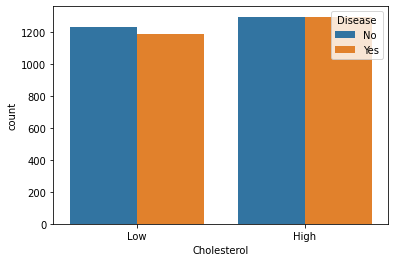

In [43]:
sns.countplot(data=df, x='Cholesterol', hue="Disease")
plt.show()

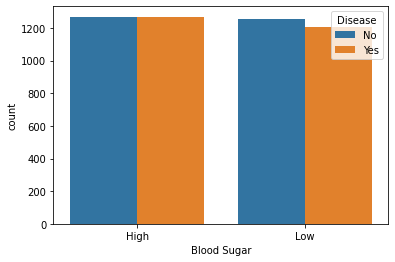

In [44]:
sns.countplot(data=df, x='Blood Sugar', hue='Disease')
plt.show()

In [26]:
#Encode the Categorical features

In [45]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'])
df['Blood Sugar'] = encoder.fit_transform(df['Blood Sugar'])
df['Disease'] = encoder.fit_transform(df['Disease'])

In [30]:
#Scale the numerical features


In [46]:
scaler =  StandardScaler()
df[['Age,','Blood Pressure']] = scaler.fit_transform(df[['Age', 'Blood Pressure']])

In [33]:
#Split the dataset into training and testing sets


In [50]:
x = df.drop("Disease", axis=1)
y = df["Disease"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [53]:
# Train a logistic regression model

In [55]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [56]:
# Make predictions on the testing set

In [58]:
y_pred = model.predict(x_test)


In [59]:
# Evaluate the performance of the model

In [65]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')

Accuracy: 0.49
Confusion Matrix:
[[276 229]
 [281 214]]
